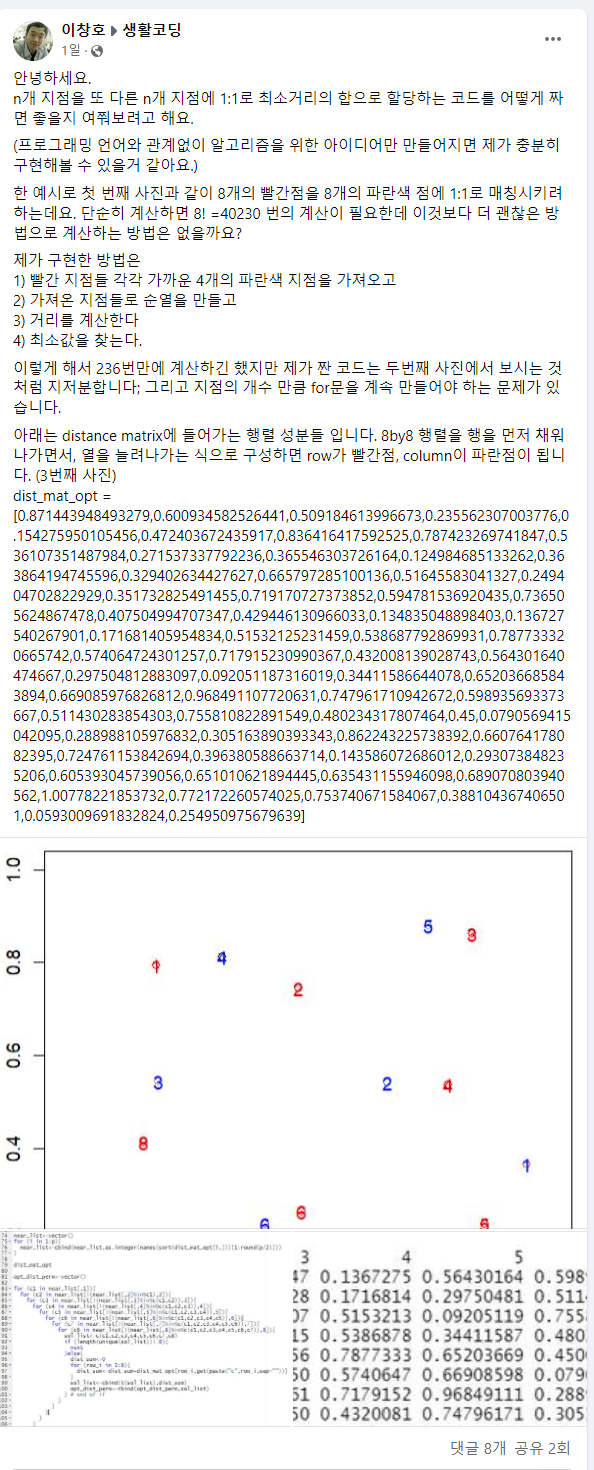

https://www.facebook.com/groups/codingeverybody/posts/8505324799507981/

In [1]:
from itertools import permutations
from tqdm import tqdm
import numpy as np
import random

In [2]:
dist_mat_opt = [
    0.871443948493279,0.600934582526441,0.509184613996673,0.235562307003776,0.154275950105456,0.472403672435917,0.836416417592525,0.787423269741847,
    0.536107351487984,0.271537337792236,0.365546303726164,0.124984685133262,0.363864194745596,0.329402634427627,0.665797285100136,0.51645583041327,
    0.249404702822929,0.351732825491455,0.719170727373852,0.594781536920435,0.736505624867478,0.407504994707347,0.429446130966033,0.134835048898403,
    0.136727540267901,0.171681405954834,0.51532125231459,0.538687792869931,0.787733320665742,0.574064724301257,0.717915230990367,0.432008139028743,
    0.564301640474667,0.297504812883097,0.092051187316019,0.34411586644078,0.652036685843894,0.669085976826812,0.968491107720631,0.747961710942672,
    0.598935693373667,0.511430283854303,0.755810822891549,0.480234317807464,0.45,0.0790569415042095,0.288988105976832,0.305163890393343,0.862243225738392,
    0.660764178082395,0.724761153842694,0.396380588663714,0.143586072686012,0.293073848235206,0.605393045739056,0.651010621894445,0.635431155946098,
    0.689070803940562,1.00778221853732,0.772172260574025,0.753740671584067,0.388104367406501,0.0593009691832824,0.254950975679639]

In [3]:
dist = np.array(dist_mat_opt).reshape(8,8)
dist

array([[0.87144395, 0.60093458, 0.50918461, 0.23556231, 0.15427595,
        0.47240367, 0.83641642, 0.78742327],
       [0.53610735, 0.27153734, 0.3655463 , 0.12498469, 0.36386419,
        0.32940263, 0.66579729, 0.51645583],
       [0.2494047 , 0.35173283, 0.71917073, 0.59478154, 0.73650562,
        0.40750499, 0.42944613, 0.13483505],
       [0.13672754, 0.17168141, 0.51532125, 0.53868779, 0.78773332,
        0.57406472, 0.71791523, 0.43200814],
       [0.56430164, 0.29750481, 0.09205119, 0.34411587, 0.65203669,
        0.66908598, 0.96849111, 0.74796171],
       [0.59893569, 0.51143028, 0.75581082, 0.48023432, 0.45      ,
        0.07905694, 0.28898811, 0.30516389],
       [0.86224323, 0.66076418, 0.72476115, 0.39638059, 0.14358607,
        0.29307385, 0.60539305, 0.65101062],
       [0.63543116, 0.6890708 , 1.00778222, 0.77217226, 0.75374067,
        0.38810437, 0.05930097, 0.25495098]])

In [4]:
# 브루트포스로 답 찾기
size = dist.shape[0]
tmp_dist = dist.max() * size
tmp_result = []
arr_size = size
for i in tqdm(permutations([x for x in range(arr_size)],arr_size)):
    base_array = [x for x in range(arr_size)] # j는 안 바뀌니까.
    cur_dist = 0
    for coordinate in zip(i, base_array):
        cur_dist += dist[coordinate]
    if tmp_dist > cur_dist:
        tmp_dist = cur_dist
        tmp_result = i
        
[x for x in tmp_result], tmp_dist

40320it [00:00, 396794.79it/s]


([3, 1, 4, 0, 6, 5, 7, 2], 1.1526574046518387)

In [5]:
def get_dist(dist_matrix, arr):
    """
    2차원 거리 array, x축은 그대로 두고 y축 컬럼의 순서,
    arr은 8 by 8 일 경우, 0~7 의 정수를 하나씩 있는 길이 8 배열
    주어진 arr의 거리를 반환한다.
    """
    cur_dist = 0
    for coordinate in zip([x for x in range(dist_matrix.shape[0])], arr):
        cur_dist += dist_matrix[coordinate]
    return cur_dist

In [6]:
def random_dist(dist_matrix, cycle=10000):
    """
    지정된 횟수만큼 랜덤 셔플링 한 결과 중 최선의 결과를 찾는다. 
    dist_matrix 는 정사각 2차원 배열
    리턴은 (현 최선 값, 그 조합)
    """
    min_dist = 999999999999999
    best_arr = []
    arr = [x for x in range(dist_matrix.shape[0])]
    for counter in range(cycle):
        random.shuffle(arr)
        cur_dist = get_dist(dist_matrix, arr)
        if cur_dist < min_dist:
            min_dist = cur_dist
            best_arr = arr
    return min_dist, best_arr
    

In [7]:
def axis_cutter(x,y, dist_matrix=dist):
    """
    2차원 메트릭스의 x,y축을 주면, 그 축을 제하고 남은 메트릭스를 되돌린다.
    """
    dist_matrix = np.delete(dist_matrix, x, 0)
    dist_matrix = np.delete(dist_matrix, y, 1)
    return dist_matrix

In [8]:
def imposiblely_good_distance_huri(dist_matrix, current_state=[]):
    """
    긍정적인 휴리스틱을 위해서 남은 거리들 중, 최선만 고른다는 가정을 한 뒤, 그 총합 리턴
    """
    for i in range(len(current_state)):
        dist_matrix = np.delete(dist_matrix, 0, 0)
    dist_matrix = np.delete(dist_matrix, current_state, 1)
        
    return sum([min(x) for x in dist_matrix])


In [9]:
def a_star(dist_matrix, silence=True):
    """
    전형적인  A* 알고리즘으로 거리 조합을 구한다
    순서대로 찾아 나서되, 
    휴리스틱값은 나머지들의 미니멈으로 한다. 
    
    인풋은 2d 정사각 array, 리턴은 (최선 값, 그 조합)
    """
    min_dist, best_arr = random_dist(dist_matrix) # 일단 쓸만한 시작점을 찾아둔다.
    if silence==False:
        print("start \t: {}, {}".format(min_dist, best_arr))
    
    # 노드는 다음과 같은 구조로 되어 있다.
    # ([1,2,3], 123) , ([1,2,4], 1235)
    # 지금 탐색한 값들과, 그 위치에서의 휴리스틱 값이다. 
    # 휴리스틱 값은 예측값 + 현재까지의 값이다. A*니까 당연하지만.
    # 예측값은 남은 matrix 의 최소값
    Nodes = [   ( [], imposiblely_good_distance_huri(dist_matrix, []) )    ]
    
    NotFind = True
    NumPairs = dist_matrix.shape[0]
    while NotFind:
        Nodes.sort(key= lambda x:x[1]) # value 기준으로 소팅하기
        min_node_name, min_node_val = Nodes.pop(0) # expand 할 제일 작은 노드 찾기
        if len(min_node_name) == NumPairs:
            print("find \t: {}, {}".format( min_node_val, [x for x in min_node_name]))
            return min_node_val, min_node_name
           
        # expand 할 가능성
        # 아직 추가하지 않은 행에서 모든 추가 가능성들을 찾아서 아이템으로 확장해서 Nodes 에 넣는다
        _ = list(set([x for x in range(NumPairs)]) - set(min_node_name))
        if silence==False:
            print(min_node_name, _, min_node_val)
        for i in _:
            new_node_name = min_node_name + [i] # 이번에 추가하는 새로운 노드 이름
            new_node_val_real = get_dist(dist_matrix, new_node_name)
            new_node_val_huri = imposiblely_good_distance_huri(dist_matrix, new_node_name)
            new_node_val = new_node_val_real + new_node_val_huri
            Nodes.append([new_node_name, new_node_val])
    
a_star(dist)

find 	: 1.152657404651839, [3, 1, 7, 0, 2, 5, 4, 6]


(1.152657404651839, [3, 1, 7, 0, 2, 5, 4, 6])